Data Creation to DuckDB

In [20]:
import duckdb
import pandas as pd

con = duckdb.connect()

data = [ 
{
    'Title' : 'Python for Data Analytics 1',
    'Author' : "James Corson",
    'Publisher' : "PublishingTops",
    'Price' : 1000.00,
    'UnitsSold': 1000
}, 
{
    'Title' : 'Python for Data Analytics 2',
    'Author' : "James Corson",
    'Publisher' : "PublishingToppy",
    'Price' : 1000.00,
    'UnitSold': 1000
},
{
    'Title' : 'Python for Data Analytics 3',
    'Author' : "James Corson",
    'Publisher' : "PublishingTops",
    'Price' : 1000.00,
    'UnitsSold': 1000
},
{
    'Title' : 'Python for Data Analytics 4',
    'Author' : "James Corson",
    'Publisher' : "PublishingToppy",
    'Price' : 1000.00,
    'UnitsSold': 1000
},
{
    'Title' : 'Python for Data Analytics 5',
    'Author' : "James Corson",
    'Publisher' : "PublishingTops",
    'Price' : 1000.00,
    'UnitsSold': 1000
},
]

df = pd.DataFrame(data)
con.register('sales', df)
# df

Basic FastAPI Example with duckdb

In [21]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/top_books")

def get_top_books():
    query = '''
        SELECT Title, UnitsSold
        FROM sales
        WHERE Publisher = 'PublishingTops'
        ORDER BY UnitsSold DESC
        LIMIT 5
        '''
    result = con.execute(query).fetchall()

    books = []
    for row in result:
        book = {
            "title" : row[0],
            "unit_sold" : row[1]
        }
        books.append(book)

    return {"top_books": books}

get_top_books()


{'top_books': [{'title': 'Python for Data Analytics 1', 'unit_sold': 1000.0},
  {'title': 'Python for Data Analytics 3', 'unit_sold': 1000.0},
  {'title': 'Python for Data Analytics 5', 'unit_sold': 1000.0}]}

Using Pandas and DuckDB

In [4]:
import pandas as pd
import duckdb

mydf = pd.DataFrame({'a': [1, 2, 3]})

result = duckdb.query("SELECT SUM(a) FROM mydf").to_df()

result

,sum(a)
0,6.0


Fetch Data and save directly to a dataframe

In [24]:
query_total_revenue = """
    SELECT SUM (price *unitsSold) as total_revenue
    FROM sales
    WHERE Publisher = 'PublishingTops'
    """
df_total_revenue = con.execute(query_total_revenue).df()

df_total_revenue

,total_revenue
0,3000000.0


Data Visualization

Text(0, 0.5, 'Total Revenue')

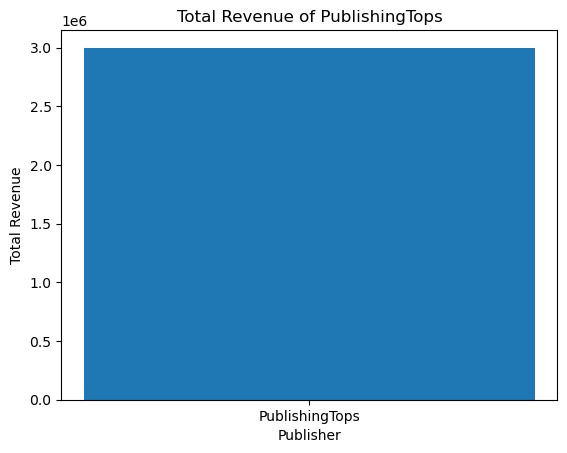

In [30]:
import matplotlib.pyplot as plt 

total_revenue = con.execute(query_total_revenue).fetchall()[0][0]
# Data initialization
plt.bar('PublishingTops', total_revenue)
# Set plot title and axis labels
plt.title("Total Revenue of PublishingTops")
plt.xlabel("Publisher")
plt.ylabel("Total Revenue")